 # PROJETO TITANIC

<p align="center">
  <img width="550" height="250" src="https://canalhistoria.pt/wp-content/uploads/2016/05/1.Portada.jpg">
</p>

### O naufrágio do RMS Titanic é uma das tragédias mais famosas da história, originando diversos livros, filmes e afins. É válido lembrar que a história narrada de forma célebre por James Cameron em seu filme de 1997, ilustra perfeitamente o motivo deste desafio. Vamos começar com uma breve perspectiva sobre o tema: O Titanic foi um navio de passageiros construído nos estaleiros da Harland and Wolff durante o período de março de 1909 a maio de 1911 em Belfast no Reino Unido. Naquela época, a construção do Titanic levou cerca de 2 anos e custou 7,5 milhões de dólares. A embarcação partiu em sua viagem inaugural de Southampton para Nova Iorque em 10 de abril de 1912, com passagem em Cherbourg-Octeville na França e em Queenstown na Irlanda. Devido a sua excelente projetação, gerou boatos de que a embarcação seria "inafundável", porém, às 23h40min do dia 14 de abril, a embarcação se chocou contra um iceberg. Em 15 de abril de 1912, o Titanic afundou matando 1.502 dos 2.224 passageiros e tripulantes, ou seja, apenas 32% desses passageiros sobreviveram ao naufrágio, tornando assim o maior desastre marítimo em tempos de paz da história.



# 1. BUSINESS UNDERSTANDING

## 1.1. Problemática
>### Os motivos que contribuíram para o naufrágio foram: fatores naturais, como o clima; e causas humanas, como negligência, pois não haviam botes salva-vidas suficientes para os passageiros e tripulantes e muitos dos botes salva-vidas não estavam com a sua capacidade máxima de pessoas a bordo, e se estivessem seria possível salvar 53% dos passageiros, mas apenas 32% deles sobreviveram.
>### Embora aqueles que escaparam com vida tiveram sua sorte, alguns grupos de pessoas eram mais propensos a escaparem da morte do que outros. A maioria do sobreviventes eram mulheres, crianças e passageiros da 1ª Classe, deixando evidente que existe algum padrão que pode ser extraído dos dados brutos, que será apresentado ao longo do projeto.

>### Então, eis que surge a questão: Quais eram as características das pessoas que sobreviveram ao desastre? Haveria um padrão entre as características dos sobreviventes?  Por que certas pessoas sobreviveram e outras não?
<p align="center">
  <img width="550" height="250" src="https://digitalks.com.br/wp-content/uploads/2018/08/blockchain-marketing-digital.png">
</p>


## 1.2. Objetivo do Projeto

>### Construir um algoritmo de *Machine Learning* para prever o índice de sobrevivência dos passageiros do *Titanic*, que tenha pelo menos 80% de acurácia, baseadas nas *features* dos *datasets* disponibilizados no desafio do *[Kaggle](https://www.kaggle.com/c/titanic)*.

## 1.3. Metodologia

> ### Será utilizada o CRISP-DM (*Cross Industry Standard Process for Data Mining*), é uma metodologia de processo de mineração de dados, capaz de transformar os dados em conhecimento e informações para estratégias de negócio.
> ## Classificador de dados utilizado no *Machine Learning*:
> * Cross Validation com K-fold;
> * KNN;
> * Árvore de Decisão; 
> * Florestas Aleatórias (Random Forest);
> * Naive Bayes;
> * Support Vector Machine (SVM);
> * QDA; 
> * Regressão Linear.

> ## Tecnologias utilizadas:

> ### Ambiente de desenvolvimento:
>> * Jupyter Notebook - Servidor do Kaggle

> ### Linguagem de programação:
>> *  Python

> ### Bibliotecas:
>> *  Pandas
>> *  Numpy
>> *  Seaborn
>> *  Matplotlib
>> *  SciKit Learn

> ### Formato dos *datasets*:
>> *  .csv (valores separados por vírgulas)

# 2. DATA UNDERSTANDING
> * Importar as bibliotecas utilizadas;
> * Importar os *datasets* utilizando a biblioteca Pandas;
> * Analisar os *datasets*.

> ### Arquivos disponibilizados pelo *[Kaggle](https://www.kaggle.com/c/titanic)*:


In [1]:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/testes/teste.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


> ### Importação de bibliotecas e definição de váriaveis de **treino** e de **teste** com a biblioteca *pandas*, utilizando os caminhos dos arquivos mostrados no código anterior.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb
import matplotlib.pyplot as pl

%matplotlib inline

train = pd.read_csv('/kaggle/input/titanic/train.csv')
test  = pd.read_csv('/kaggle/input/titanic/test.csv')

> ### A partir disto, vamos criar um algoritmo capaz de dizer se uma pessoa sobreviveria à tragédia do Titanic, baseado em *Features* que o próprio desafio nos disponibiliza através de um algoritmo de *Machine Learning*.

> ### Analisando o *dataset*:

> * **Conjunto de treinamento**
>> #### A função abaixo, nos mostra as 5 primeiras linhas do *Train Dataset*.

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


> * **Conjunto de teste**
>> #### A função abaixo, nos mostra as 5 primeiras linhas do *Test Dataset*.

In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


> * Abaixo mostra a dimensão do conjunto de dados de treino:
>> - 891 registros (linhas);
>> - 12  *features* (colunas).


In [5]:
train.shape

(891, 12)

> * Abaixo mostra a dimensão do conjunto de dados de teste:
>> - 418 registros (linhas);
>> - 11  *features* (colunas).

> Obs: Tem 1 coluna a menos, pois é a *feature* que indica se o passageiro sobreviveu (1) ou não (0) e não deve estar no conjunto de testes, pois é a previsão que o algoritmo nos mostrará.


In [6]:
test.shape

(418, 11)

> * Abaixo mostra as informações de cada *features* do conjunto de treino:

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


> * Abaixo mostra as informações de cada *features* do conjunto de teste:

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


> ### Os *datasets* possuem uma quantidade de dados nulos (sem valor) em algumas *features*.
> *  Abaixo apresenta a quantidade de dados nulos do conjunto de treino:


In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

> * Abaixo apresenta a quantidade de dados nulos do conjunto de teste:


In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

> ### A seguir, foram escolhidos alguns gráficos a serem plotados para a visualização de como as *features* se comportam:

In [11]:
def grafico(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar', stacked=True, figsize=(10,5))

> * Gráfico baseado no sexo:

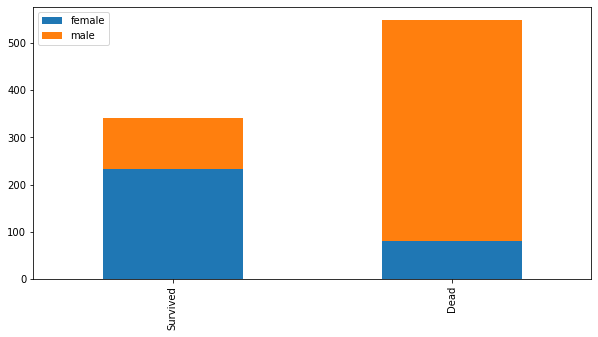

In [12]:
grafico('Sex')

> * Gráfico baseado na classe de embarque:

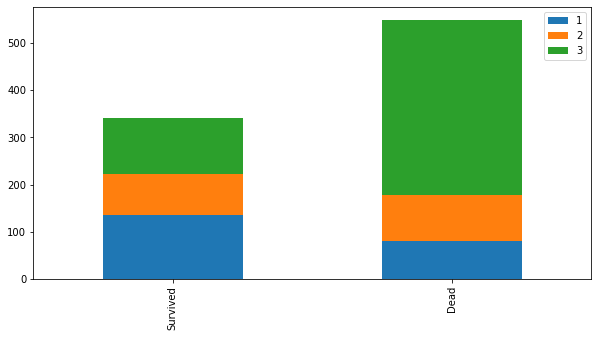

In [13]:
grafico('Pclass')

> * Gráfico baseado no número de irmãos/cônjuges a bordo:

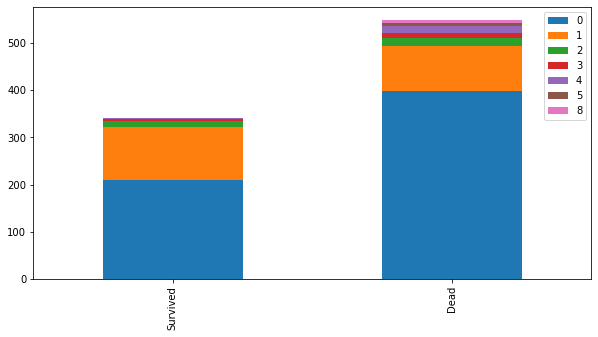

In [14]:
grafico('SibSp')

> * Gráfico baseado no número de pais/filhos a bordo:

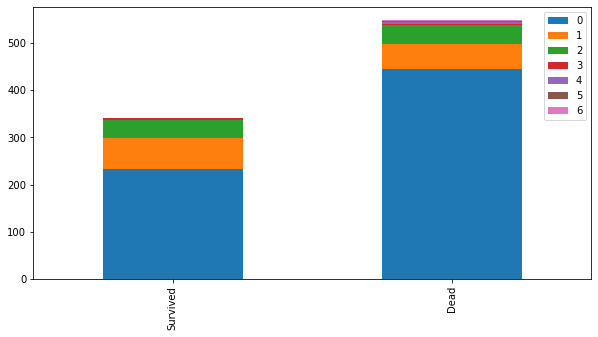

In [15]:
grafico('Parch')

> * Gráfico baseado em qual porto o navio embarcou:

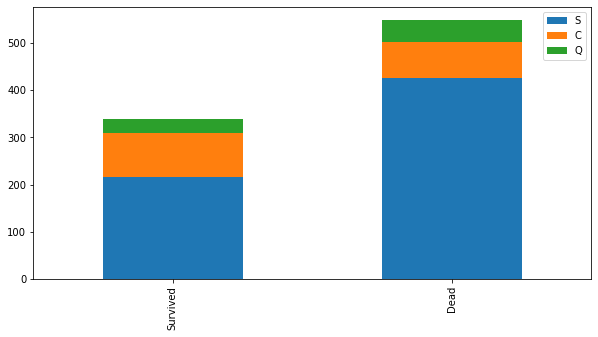

In [16]:
grafico('Embarked')

# 3. DATA PREPARATION

> * Criar classes baseados nos pronomes de tratamento;
> * Preencher os valores vazios das idades, baseados nos nas médias de idade dos pronomes de tratamento;
> * Substituir valores da *feature* 'Sex' para valores numéricos;
> * Criar classes para as idades.

> ### Nesta etapa, utiliza-se a *feature* 'Name' para criar a *feature* 'Title', que nada mais é do que a extração do título dos nomes da pessoas,isto é, os pronomes de tratamento, por exemplo: Mr., Miss., etc.:


In [17]:
train_test = [train, test]
for dataset in train_test:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

> *  Contagem dos títulos presentes no conjunto de treino:

In [18]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Ms            1
Don           1
Jonkheer      1
Mme           1
Lady          1
Capt          1
Countess      1
Sir           1
Name: Title, dtype: int64

> * Contagem de cada titulo presente no conjunto de teste:

In [19]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

> ###  Transformando os títulos em representação numérica:

In [20]:
title_map = {"Mr": 0,
            "Miss": 1,
            "Mrs": 2,
            "Master": 3,
            "Dr": 3,
            "Rev": 3,
            "Col": 3,
            "Major": 3,
            "Mlle": 3,
            "Ms": 3,
            "Don": 3,
            "Lady": 3,
            "Jonkheer": 3,
            "Countess": 3,
            "Mme": 3,
            "Sir": 3,
            "Capt": 3}
for dataset in train_test:
    dataset['Title'] = dataset['Title'].map(title_map)

In [21]:
test["Title"].fillna(0, inplace=True)

In [22]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

> ### Abaixo mostra os valores atribuídos para a *feature* 'Title' do conjunto de treino:

In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


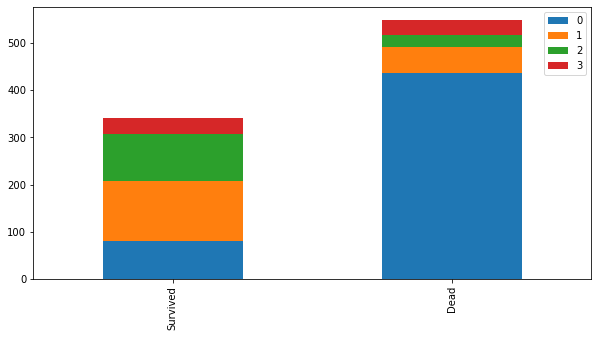

In [24]:
grafico('Title')

> ### Vamos retirar a *feature* 'Name' de ambos os conjuntos:

In [25]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [26]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2.0


In [27]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


> ### A seguir, substituímos os valores 'male' e 'female' da *feature* 'Sex' por 0 e 1 respectivamente, para criarmos o gráfico de sobreviventes entre homens e mulheres:

In [28]:
sex_map = {"male": 0, "female": 1}
for dataset in train_test:
    dataset['Sex'] = dataset['Sex'].map(sex_map)

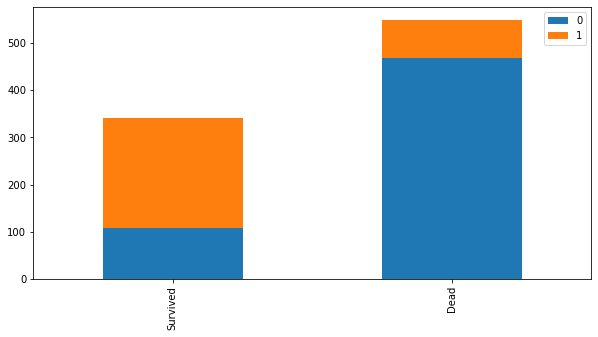

In [29]:
grafico('Sex')

In [30]:
train.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,0,NaN,0,0,374910,8.0500,NaN,S,0
96,97,0,1,0,71.0,0,0,PC 17754,34.6542,A5,C,0
97,98,1,1,0,23.0,0,1,PC 17759,63.3583,D10 D12,C,0
98,99,1,2,1,34.0,0,1,231919,23.0000,NaN,S,2


> ### Como existem várias idades presentes nos conjuntos de dados, se criássemos um gráfico não teria como saber qual a idade que mais sobreviveu à tragédia, pois teríamos muitos resultados...

In [31]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

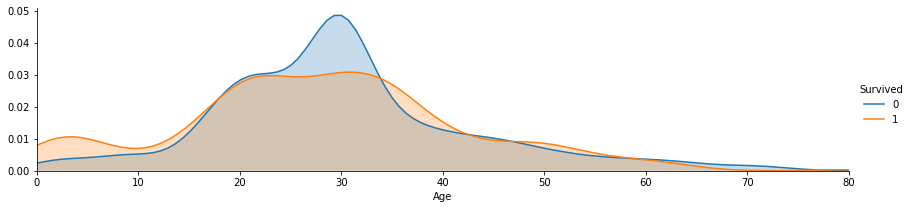

In [32]:
facet = sb.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sb.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
pl.show()

> ### Então, criamos classes e classificamos as idades por faixas etárias:
| Faixa etária | Classe |
|--------------|--------|
| 0 - 16       | 0      |
| 17 - 26      | 1      |
| 27 - 36      | 2      |
| 37 - 62      | 3      |
| Maior que 62 | 4      |
 


> * Assim criando apenas 5 classes, vamos obter o resultado apenas das 5 classes.

In [33]:
for dataset in train_test:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] =0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 62), 'Age'] = 4

> ### Desta forma, tornamos o gráfico mais limpo e fácil de ser interpretado:

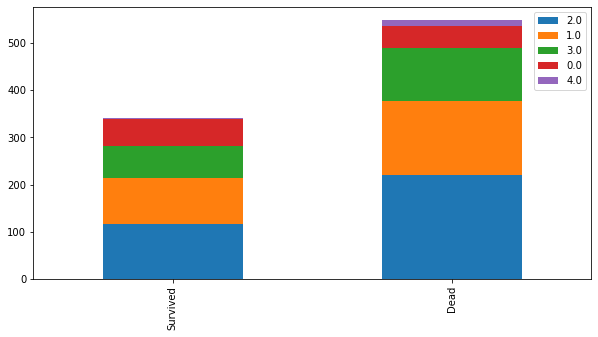

In [34]:
grafico('Age')

> ### Nesta etapa, um gráfico é plotado para analisar os lugares de embarque das pessoas:

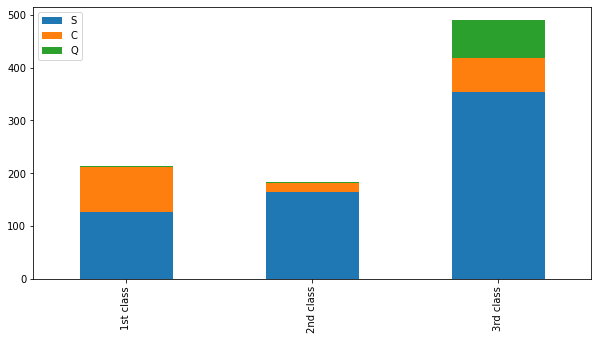

In [35]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

> * Mais do que 50% de cada classe veio do porto 'S', então está sendo preenchido os vazios com 'S'.

In [36]:
for dataset in train_test:
    dataset['Embarked'] =  dataset['Embarked'].fillna('S')

In [37]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


> ### Nesta etapa, é feito um mapping dos lugares de embarque para números, transformando as letras em representação númerica, isto é, atribuímos aos valores da feature 'Embarked' os numeros 0, 1 e 2:

In [38]:
emb_map = {"S": 0,
           "C": 1,
           "Q": 2}
for dataset in train_test:
    dataset['Embarked'] = dataset['Embarked'].map(emb_map)

> ### A seguir, é preenchido os valores vazios das tarifas com a média de cada conjunto:

In [39]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

> ### Foi criada uma faixa de valores para a tarifa:
| Faixa valores| Classe |
|--------------|--------|
| 0 - 17       | 0      |
| 18 - 30      | 1      |
| 31 - 100     | 2      |
| > 100        | 3      |

In [40]:
for dataset in train_test:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] =0
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 100), 'Fare'] = 3

> ### Aqui foi feito um *substring* utilizando apenas a primeira posição da cabine, ou seja, apenas as letras:

In [41]:
train.Cabin.value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
D              3
C22 C26        3
              ..
E38            1
C104           1
C30            1
D15            1
A36            1
Name: Cabin, Length: 147, dtype: int64

In [42]:
for dataset in train_test:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

> * O gráfico abaixo mostra a quantidade de passageiros em determinadas seções de cabines baseada nas suas classes:

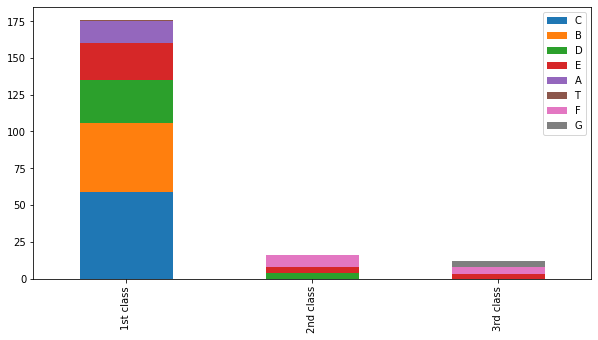

In [43]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

> ### É feito um *mapping* das cabines substituindo elas por valores númericos que variam de 0.4 em 0.4:

In [44]:
cab_map = {"A": 0,
           "B": 0.4,
           "C": 0.8,
           "D": 1.2,
           "E": 1.6,
           "F": 2.0,
           "G": 2.4,
           "T": 2.8}
for dataset in train_test:
    dataset['Cabin'] = dataset['Cabin'].map(cab_map)

In [45]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

> ### Aqui começa a análise relacionado ao tamanho da família dos passeiros:

In [46]:
train["FamilySize"] = train["SibSp"] + train["Parch"]  + 1
test["FamilySize"] = test["SibSp"] + test["Parch"]  + 1

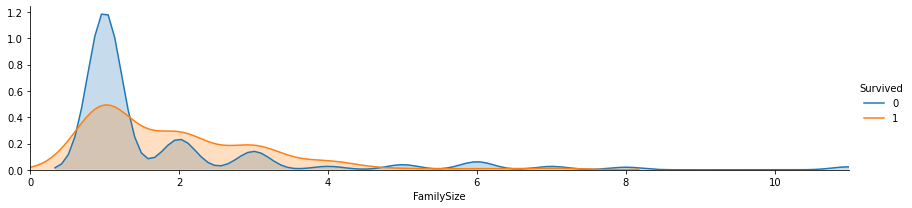

In [47]:
facet = sb.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sb.kdeplot, 'FamilySize', shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()

> ### Aqui também é feito um mapping do tamanho das famílias, substituindo elas por valores númericos que variam de 0.4 em 0.4:

In [48]:
family_map = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_map)

In [49]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [50]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0,0,330911,0.0,2.0,2,0.0,0.0
1,893,3,1,3.0,1,0,363272,0.0,2.0,0,2.0,0.4
2,894,2,0,3.0,0,0,240276,0.0,2.0,2,0.0,0.0
3,895,3,0,2.0,0,0,315154,0.0,2.0,0,0.0,0.0
4,896,3,1,1.0,1,1,3101298,0.0,2.0,0,2.0,0.8


> ### E para finalizar a preparação de dados do *dataset*, foi definido que:
> * As *features* 'SibSP' e 'Parch' vão ser *dropadas*, pois  não são mais necessárias;
> * As *features* 'Ticket' e 'PassengerId' não serão importantes para nossa análise;
> * E no conjunto de treino a *feature* 'Survived' vai ser eliminada.

In [51]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [52]:
train_data.head(10)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0
5,3,0,2.0,0.0,2.0,2,0,0.0
6,1,0,3.0,2.0,1.6,0,0,0.0
7,3,0,0.0,1.0,2.0,0,3,1.6
8,3,1,2.0,0.0,2.0,0,2,0.8
9,2,1,0.0,2.0,1.8,1,2,0.4


# 4. MODELING

> ### Foram definidos alguns classificadores que serão utilizados para analisarmos qual será o melhor método a ser aplicado no algoritmo, baseado no resultado da apuração *SCORE*:
> * Cross Validation com K-fold;
> * KNN;
> * Árvore de Decisão; 
> * Florestas Aleatórias (Random Forest);
> * Naive Bayes;
> * Support Vector Machine (SVM);
> * QDA; 
> * Regressão Linear.

> ### Importando classificadores:

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import linear_model
from sklearn.svm import SVC

import numpy as np

In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Cabin       891 non-null    float64
 6   Embarked    891 non-null    int64  
 7   Title       891 non-null    int64  
 8   FamilySize  891 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 62.8 KB


# 5. EVALUATION
> * Será verificado se os resultados foram atingidos baseados no objetivo definido do projeto: **atingir pelo menos 80% de acurácia.**

> ## Cross Validation com K-fold:

In [55]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

> ## KNN:

In [56]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

[0.82222222 0.76404494 0.80898876 0.83146067 0.87640449 0.82022472
 0.85393258 0.79775281 0.84269663 0.84269663]


82.6

> ## Árvore de Decisão:

In [57]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

[0.76666667 0.82022472 0.7752809  0.7752809  0.88764045 0.76404494
 0.82022472 0.82022472 0.75280899 0.79775281]


79.8

> ## Florestas Aleatórias (Random Forest):

In [58]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

[0.77777778 0.84269663 0.79775281 0.7752809  0.87640449 0.79775281
 0.79775281 0.83146067 0.73033708 0.82022472]


80.47

> ## Naive Bayes

In [59]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

[0.85555556 0.73033708 0.75280899 0.75280899 0.70786517 0.80898876
 0.76404494 0.80898876 0.86516854 0.83146067]


78.78

>## Support Vector Machine (SVM):

In [60]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100,2)

[0.83333333 0.79775281 0.83146067 0.82022472 0.84269663 0.82022472
 0.84269663 0.85393258 0.84269663 0.86516854]


83.5

> ## QDA:

In [61]:
clf = QuadraticDiscriminantAnalysis()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100,2)

[0.82222222 0.74157303 0.80898876 0.75280899 0.76404494 0.7752809
 0.7752809  0.80898876 0.80898876 0.82022472]


78.78

> ## Regressão Linear:

In [62]:
clf = linear_model.LinearRegression()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1)
print(score)
round(np.mean(score)*100,2)

[0.45148409 0.33844309 0.38211794 0.35618647 0.40199197 0.35627015
 0.37122081 0.39725873 0.46033203 0.48206659]


39.97

# 6. DEPLOYMENT

> ### Criamos um pequeno *dataset* com os dados dos integrantes do grupo do projeto para o algoritmo ser executado e testarmos o seu funcionamento.


In [63]:
clf = SVC()

clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()

prediction = clf.predict(test_data)

test_data2 = pd.read_csv('/kaggle/input/testes/teste.csv')
prediction2 = clf.predict(test_data2)

print(prediction2)

[0 1 0 0 0]


> * O resultado apresentado acima, mostra que dos 5 integrantes do grupo, baseado nas *features*, apenas 1 integrante sobreviveria.

> ### Por fim, executamos o algoritmo no conjunto de teste do projeto para prever se cada um dos passeiros do Titanic sobreviveria à tragédia ou não, baseado na análise, definição das técnicas e *datasets* disponibilizados pelo desafio do [Kaggle](https://www.kaggle.com/c/titanic).
> ### O classificador escolhido para fazer a predição do conjunto de dados foi o **Support Vector Machine (SVM)**, no qual obtivemos o *score* mais alto, de 83,5.  

In [64]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('/kaggle/working/submission.csv', index=False)

In [65]:
submission = pd.read_csv('/kaggle/working/submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
